In [1]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [2]:
baches_meta = unpickle('cifar-10-batches-py/batches.meta')

In [3]:
class_name=baches_meta[b'label_names']
dict_class={}
j=0
for i in class_name:
    dict_class[i]=j
    j+=1
dict_class[b'bird']

2

In [4]:
import numpy as np
test_batch=unpickle('cifar-10-batches-py/test_batch')
test_labels=test_batch[b'labels']
test_data=test_batch[b'data']
a=np.argwhere(test_labels==np.uint8(dict_class[b'bird']))
bird_test_index=np.ndarray.flatten(a)
bird_test_data=test_data[bird_test_index]
print(bird_test_data.shape)
print('test size = ', bird_test_data.shape[0])

train_batch1 = unpickle('cifar-10-batches-py/data_batch_1')
train_label1 = train_batch1[b'labels']
train_data1 = train_batch1[b'data']
a=np.argwhere(train_label1==np.uint8(dict_class[b'bird']))
bird_train_index1=np.ndarray.flatten(a)
bird_train_data1=train_data1[bird_train_index1]
print(bird_train_data1.shape)

train_batch2 = unpickle('cifar-10-batches-py/data_batch_2')
train_label2 = train_batch2[b'labels']
train_data2 = train_batch2[b'data']
a=np.argwhere(train_label2==np.uint8(dict_class[b'bird']))
bird_train_index2=np.ndarray.flatten(a)
bird_train_data2=train_data2[bird_train_index2]
print(bird_train_data2.shape) 

train_batch3 = unpickle('cifar-10-batches-py/data_batch_3')
train_label3 = train_batch3[b'labels']
train_data3 = train_batch3[b'data']
a=np.argwhere(train_label3==np.uint8(dict_class[b'bird']))
bird_train_index3=np.ndarray.flatten(a)
bird_train_data3=train_data3[bird_train_index3]
print(bird_train_data3.shape) 

train_batch4 = unpickle('cifar-10-batches-py/data_batch_4')
train_label4 = train_batch4[b'labels']
train_data4 = train_batch4[b'data']
a=np.argwhere(train_label4==np.uint8(dict_class[b'bird']))
bird_train_index4=np.ndarray.flatten(a)
bird_train_data4=train_data4[bird_train_index4]
print(bird_train_data4.shape) 

train_batch5 = unpickle('cifar-10-batches-py/data_batch_5')
train_label5 = train_batch5[b'labels']
train_data5 = train_batch5[b'data']
a=np.argwhere(train_label5==np.uint8(dict_class[b'bird']))
bird_train_index5=np.ndarray.flatten(a)
bird_train_data5=train_data5[bird_train_index5]
print(bird_train_data5.shape) 
print('train size =', bird_train_data1.shape[0]+bird_train_data2.shape[0]+bird_train_data3.shape[0]+bird_train_data4.shape[0]+bird_train_data5.shape[0])

(1000, 3072)
test size =  1000
(1032, 3072)
(1010, 3072)
(965, 3072)
(1041, 3072)
(952, 3072)
train size = 5000


In [5]:
bird_data = np.concatenate((bird_test_data, bird_train_data1, bird_train_data2, bird_train_data3, bird_train_data4, bird_train_data5), axis=0)
bird_data.shape

(6000, 3072)

The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.

In [6]:
bird_data

array([[100,  68, 116, ...,  68,  94, 100],
       [ 66,  66,  64, ..., 146, 145, 144],
       [201, 187, 146, ...,  28,  21,  11],
       ...,
       [ 84,  79,  87, ...,  31,  54,  53],
       [188, 186, 187, ..., 186, 171, 170],
       [145, 151, 156, ...,  56,  53,  54]], dtype=uint8)

In [7]:
pixel_list = []
for i in range(6000):
    for j in range(1024):
        red = bird_data[i][j]
        green = bird_data[i][j+1024]
        blue = bird_data[i][j+2048]
        pixel = np.array([red, green, blue])
        pixel_list.append(pixel) 

In [8]:
pixel_array=np.array(pixel_list)
print(pixel_array)
print(pixel_array.shape)

[[100 103  74]
 [ 68  91  65]
 [116 162 109]
 ...
 [ 39  41  56]
 [ 36  38  53]
 [ 37  39  54]]
(6144000, 3)


In [9]:
import PIL.Image as image
from sklearn.cluster import KMeans
km = KMeans(n_clusters=24)
label = km.fit_predict(pixel_array)

In [10]:
km.cluster_centers_

array([[ 43.03828575,  43.32698174,  32.40669925],
       [155.4030637 , 140.94438611, 110.03847219],
       [176.05108351, 207.16120417, 235.81229779],
       [104.41065038, 104.80734557,  93.69607424],
       [245.44478275, 246.68628529, 245.41406068],
       [212.02031055, 194.7707489 , 151.15651139],
       [ 77.74041271,  74.53397659,  39.16585218],
       [ 88.91085616, 135.99021616, 188.30645693],
       [191.04751744, 192.60818431, 190.3870233 ],
       [135.08020941, 157.74683982,  80.38429824],
       [121.2179202 , 125.13469862, 120.45990386],
       [121.00220085,  89.71003003,  56.17199437],
       [ 57.7523337 ,  97.65769134, 137.3592767 ],
       [178.6682179 , 168.24601002, 124.17935839],
       [ 83.70997837,  85.04743626,  73.56632085],
       [144.79140753, 148.45728011, 145.12758896],
       [ 57.52015504,  62.38348504,  59.04674193],
       [195.53553702, 158.96971404,  71.17654099],
       [ 16.62166898,  17.32929663,  14.27788998],
       [136.96424281, 119.57483

In [11]:
pixel_array.dtype
# out = np.zeros((4,), dtype=np.ndarray)

dtype('uint8')

In [12]:
label_list = []
for x in label:
        out = np.zeros((24,), dtype=int)
        out[x] += 1
        label_list.append(out)
label_array = np.array(label_list)
label_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [13]:
label_array=label_array.reshape(6000, 32, 32, 24)

In [14]:
label_array # output

array([[[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        ...,

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 1]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
    

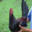

In [15]:
pixel_array=pixel_array.reshape(6000,32,32,3)
org_img = image.fromarray(pixel_array[0])
org_img

In [17]:
a = map(lambda x: image.fromarray(x), pixel_array)
gray_imgs = map(lambda x: x.convert(mode='L'), a)

In [18]:
gray_imgs = list(gray_imgs)
gray_imgs = np.array(list(map(lambda x: np.array(x), gray_imgs)))

In [19]:
gray_imgs.shape

(6000, 32, 32)

In [20]:
gray_imgs = gray_imgs.reshape(6000, 32, 32, 1)
import tensorflow as tf
def ce(y_true, y_pred):
        return tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred,dim=3)

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Reshape
from keras.callbacks import ModelCheckpoint
# create model
model = Sequential()
# add model layers
model.add(Conv2D(20, kernel_size=5, activation='relu', input_shape=(32, 32, 1),padding='same'))
model.add(MaxPool2D(pool_size=2, strides=2))
# model.add(Conv2D(32, kernel_size=5, activation='relu',padding='same'))
# model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dense(24576))
model.add(Reshape((32, 32, 24)))
# compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss=ce, metrics=['accuracy'])
# train the model
model.fit(gray_imgs, label_array, epochs=30, validation_data=(gray_imgs[0:1000], label_array[0:1000]), batch_size=500)

Using TensorFlow backend.


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Train on 6000 samples, validate on 1000 samples
Epoch 1/30
6000/6000 [==============================] - 63s 10ms/step - loss: 79.1456 - acc: 0.0498 - val_loss: 58.8347 - val_acc: 0.0575
Epoch 2/30
6000/6000 [==============================] - 59s 10ms/step - loss: 22.8092 - acc: 0.0653 - val_loss: 5.3634 - val_acc: 0.0765
Epoch 3/30
6000/6000 [==============================] - 54s 9ms/step - loss: 3.8776 - acc: 0.0844 - val_loss: 3.1510 - val_acc: 0.1001
Epoch 4/30
6000/6000 [==============================] - 55s 9ms/step - loss: 3.0510 - acc: 0.1068 - val_loss: 2.8984 - val_acc: 0.1365
Epoch 5/30
6000/6000 [==============================] - 54s 9ms/step - loss: 2.8440 - acc: 0.1463 - val_loss: 2.6866 - val_acc: 0.1890
Epoch 6/30
6000/6000 [==============================] - 58s 10ms/step - loss: 2.6

In [34]:
train_score = model.evaluate(gray_imgs, label_array, batch_size=500)
print('training loss(error) =', train_score[0])
print('training accuracy =', train_score[1])

6000/6000 [==============================] - 17s 3ms/step
training loss(error) = 0.6000187993049622
training accuracy = 0.8532037685314814


In [35]:
test_score = model.evaluate(gray_imgs[0:1000], label_array[0:1000], batch_size=500)
print('training loss(error) =', test_score[0])
print('training accuracy =', test_score[1])

1000/1000 [==============================] - 2s 2ms/step
training loss(error) = 0.5910458564758301
training accuracy = 0.8553622961044312


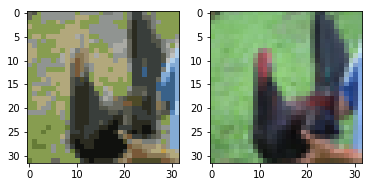

In [32]:
test=gray_imgs[0]
test=test.reshape(1,32,32,1)

session=tf.Session()
result=session.run(tf.argmax(tf.nn.softmax(model.predict(test),-1),-1))
result = result.reshape(32,32)
result_array=np.zeros((32,32,3),'uint8')
cent=np.uint8(km.cluster_centers_)
for i in range(32):
    for j in range(32):
        result_array[i,j,:] = cent[result[i][j]]
image.fromarray(result_array)
import matplotlib.pyplot as plt
plt.subplot(121)
plt.imshow(image.fromarray(result_array))
plt.subplot(122)
plt.imshow(image.fromarray(pixel_array[0]))

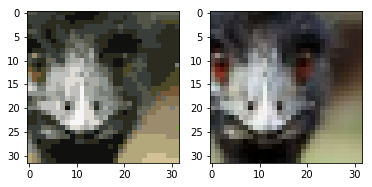

In [23]:
test=gray_imgs[1]
test=test.reshape(1,32,32,1)
session=tf.Session()
result=session.run(tf.argmax(tf.nn.softmax(model.predict(test),-1),-1))
result = result.reshape(32,32)
result_array=np.zeros((32,32,3),'uint8')
cent=np.uint8(km.cluster_centers_)
for i in range(32):
    for j in range(32):
        result_array[i,j,:] = cent[result[i][j]]
image.fromarray(result_array)

plt.subplot(121)
plt.imshow(image.fromarray(result_array))
plt.subplot(122)
plt.imshow(image.fromarray(pixel_array[1]))

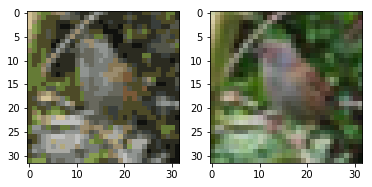

In [24]:
test=gray_imgs[2]
test=test.reshape(1,32,32,1)
session=tf.Session()
result=session.run(tf.argmax(tf.nn.softmax(model.predict(test),-1),-1))
result = result.reshape(32,32)
result_array=np.zeros((32,32,3),'uint8')
cent=np.uint8(km.cluster_centers_)
for i in range(32):
    for j in range(32):
        result_array[i,j,:] = cent[result[i][j]]
image.fromarray(result_array)

plt.subplot(121)
plt.imshow(image.fromarray(result_array))
plt.subplot(122)
plt.imshow(image.fromarray(pixel_array[2]))

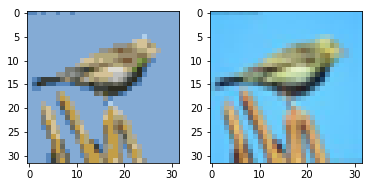

In [25]:
test=gray_imgs[3]
test=test.reshape(1,32,32,1)
session=tf.Session()
result=session.run(tf.argmax(tf.nn.softmax(model.predict(test),-1),-1))
result = result.reshape(32,32)
result_array=np.zeros((32,32,3),'uint8')
cent=np.uint8(km.cluster_centers_)
for i in range(32):
    for j in range(32):
        result_array[i,j,:] = cent[result[i][j]]
image.fromarray(result_array)

plt.subplot(121)
plt.imshow(image.fromarray(result_array))
plt.subplot(122)
plt.imshow(image.fromarray(pixel_array[3]))

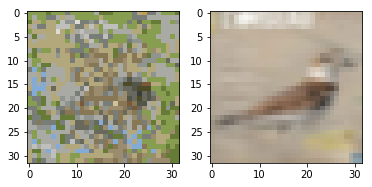

In [26]:
test=gray_imgs[4]
test=test.reshape(1,32,32,1)
session=tf.Session()
result=session.run(tf.argmax(tf.nn.softmax(model.predict(test),-1),-1))
result = result.reshape(32,32)
result_array=np.zeros((32,32,3),'uint8')
cent=np.uint8(km.cluster_centers_)
for i in range(32):
    for j in range(32):
        result_array[i,j,:] = cent[result[i][j]]
image.fromarray(result_array)

plt.subplot(121)
plt.imshow(image.fromarray(result_array))
plt.subplot(122)
plt.imshow(image.fromarray(pixel_array[4]))

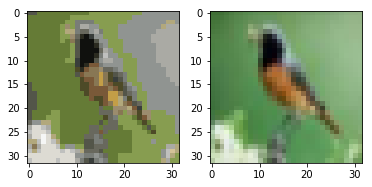

In [27]:
test=gray_imgs[5]
test=test.reshape(1,32,32,1)
session=tf.Session()
result=session.run(tf.argmax(tf.nn.softmax(model.predict(test),-1),-1))
result = result.reshape(32,32)
result_array=np.zeros((32,32,3),'uint8')
cent=np.uint8(km.cluster_centers_)
for i in range(32):
    for j in range(32):
        result_array[i,j,:] = cent[result[i][j]]
image.fromarray(result_array)

plt.subplot(121)
plt.imshow(image.fromarray(result_array))
plt.subplot(122)
plt.imshow(image.fromarray(pixel_array[5]))

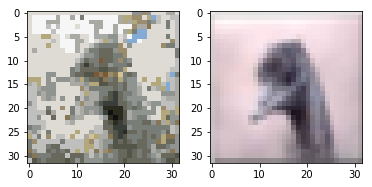

In [33]:
test=gray_imgs[6]
test=test.reshape(1,32,32,1)
session=tf.Session()
result=session.run(tf.argmax(tf.nn.softmax(model.predict(test),-1),-1))
result = result.reshape(32,32)
result_array=np.zeros((32,32,3),'uint8')
cent=np.uint8(km.cluster_centers_)
for i in range(32):
    for j in range(32):
        result_array[i,j,:] = cent[result[i][j]]
image.fromarray(result_array)

plt.subplot(121)
plt.imshow(image.fromarray(result_array))
plt.subplot(122)
plt.imshow(image.fromarray(pixel_array[6]))

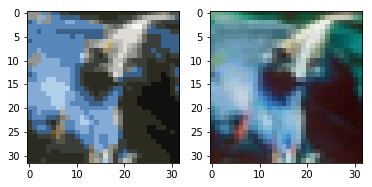

In [29]:
test=gray_imgs[7]
test=test.reshape(1,32,32,1)
session=tf.Session()
result=session.run(tf.argmax(tf.nn.softmax(model.predict(test),-1),-1))
result = result.reshape(32,32)
result_array=np.zeros((32,32,3),'uint8')
cent=np.uint8(km.cluster_centers_)
for i in range(32):
    for j in range(32):
        result_array[i,j,:] = cent[result[i][j]]
image.fromarray(result_array)

plt.subplot(121)
plt.imshow(image.fromarray(result_array))
plt.subplot(122)
plt.imshow(image.fromarray(pixel_array[7]))

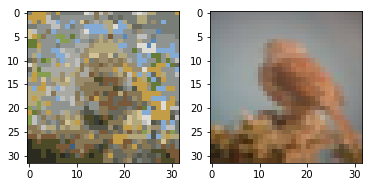

In [30]:
test=gray_imgs[8]
test=test.reshape(1,32,32,1)
session=tf.Session()
result=session.run(tf.argmax(tf.nn.softmax(model.predict(test),-1),-1))
result = result.reshape(32,32)
result_array=np.zeros((32,32,3),'uint8')
cent=np.uint8(km.cluster_centers_)
for i in range(32):
    for j in range(32):
        result_array[i,j,:] = cent[result[i][j]]
image.fromarray(result_array)

plt.subplot(121)
plt.imshow(image.fromarray(result_array))
plt.subplot(122)
plt.imshow(image.fromarray(pixel_array[8]))

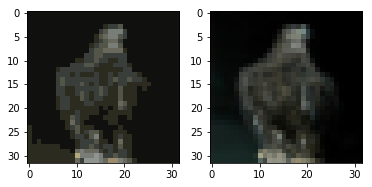

In [31]:
test=gray_imgs[9]
test=test.reshape(1,32,32,1)
session=tf.Session()
result=session.run(tf.argmax(tf.nn.softmax(model.predict(test),-1),-1))
result = result.reshape(32,32)
result_array=np.zeros((32,32,3),'uint8')
cent=np.uint8(km.cluster_centers_)
for i in range(32):
    for j in range(32):
        result_array[i,j,:] = cent[result[i][j]]
image.fromarray(result_array)

plt.subplot(121)
plt.imshow(image.fromarray(result_array))
plt.subplot(122)
plt.imshow(image.fromarray(pixel_array[9]))